<a href="https://colab.research.google.com/github/vigeecarolina/first_report/blob/master/BMW.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import LabelEncoder,MinMaxScaler

import folium
import plotly.express as px

In [ ]:
df_bmw=pd.read_csv("/content/drive/MyDrive/DATA _EN_GINEERING/DSC0922_data_engineering/Clases/TAREA BMW/bmw_pricing_v2.csv")


In [ ]:
df_bmw.head()

,marca,modelo,km,potencia,fecha_registro,tipo_gasolina,color,tipo_coche,volante_regulable,aire_acondicionado,camara_trasera,asientos_traseros_plegables,elevalunas_electrico,bluetooth,gps,alerta_lim_velocidad,precio,fecha_venta
0,BMW,118,140411.0,100.0,2012-02-01,diesel,black,convertible,True,True,False,False,True,True,True,False,11300.0,2018-01-01
1,BMW,M4,13929.0,317.0,2016-04-01,petrol,grey,convertible,True,True,False,False,False,True,True,True,69700.0,2018-02-01
2,BMW,320,183297.0,120.0,2012-04-01,diesel,white,convertible,False,False,False,False,True,False,True,False,10200.0,2018-02-01
3,BMW,420,128035.0,135.0,2014-07-01,diesel,red,convertible,True,True,False,False,True,True,True,True,25100.0,2018-02-01
4,BMW,425,97097.0,160.0,2014-12-01,diesel,silver,convertible,True,True,False,False,False,True,True,True,33400.0,2018-04-01


In [ ]:
df_bmw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4843 entries, 0 to 4842
Data columns (total 18 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   marca                        4841 non-null   object 
 1   modelo                       4840 non-null   object 
 2   km                           4841 non-null   float64
 3   potencia                     4842 non-null   float64
 4   fecha_registro               4842 non-null   object 
 5   tipo_gasolina                4838 non-null   object 
 6   color                        4831 non-null   object 
 7   tipo_coche                   4834 non-null   object 
 8   volante_regulable            4839 non-null   object 
 9   aire_acondicionado           4841 non-null   object 
 10  camara_trasera               4841 non-null   object 
 11  asientos_traseros_plegables  4839 non-null   object 
 12  elevalunas_electrico         4841 non-null   object 
 13  bluetooth         

In [ ]:
df_bmw.shape

(4843, 18)

In [ ]:
df_bmw.describe()

,km,potencia,precio
count,4.841000e+03,4842.000000,4837.000000
mean,1.409593e+05,128.981826,15831.920612
std,6.020853e+04,38.994839,9222.630708
min,-6.400000e+01,0.000000,100.000000
25%,1.028840e+05,100.000000,10800.000000
50%,1.410800e+05,120.000000,14200.000000
75%,1.752170e+05,135.000000,18600.000000
max,1.000376e+06,423.000000,178500.000000


In [ ]:
#Ver duplicados

In [ ]:
df_bmw[df_bmw.duplicated(keep= False)]

,marca,modelo,km,potencia,fecha_registro,tipo_gasolina,color,tipo_coche,volante_regulable,aire_acondicionado,camara_trasera,asientos_traseros_plegables,elevalunas_electrico,bluetooth,gps,alerta_lim_velocidad,precio,fecha_venta


In [ ]:
df_bmw2 = df_bmw.copy()

In [ ]:
len(df_bmw2)

4843

In [ ]:
df_bmw2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4843 entries, 0 to 4842
Data columns (total 18 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   marca                        4841 non-null   object 
 1   modelo                       4840 non-null   object 
 2   km                           4841 non-null   float64
 3   potencia                     4842 non-null   float64
 4   fecha_registro               4842 non-null   object 
 5   tipo_gasolina                4838 non-null   object 
 6   color                        4831 non-null   object 
 7   tipo_coche                   4834 non-null   object 
 8   volante_regulable            4839 non-null   object 
 9   aire_acondicionado           4841 non-null   object 
 10  camara_trasera               4841 non-null   object 
 11  asientos_traseros_plegables  4839 non-null   object 
 12  elevalunas_electrico         4841 non-null   object 
 13  bluetooth         

In [ ]:
#ver nulos

In [ ]:
df_bmw2.isnull().sum()

marca                           2
modelo                          3
km                              2
potencia                        1
fecha_registro                  1
tipo_gasolina                   5
color                          12
tipo_coche                      9
volante_regulable               4
aire_acondicionado              2
camara_trasera                  2
asientos_traseros_plegables     4
elevalunas_electrico            2
bluetooth                       4
gps                             0
alerta_lim_velocidad            2
precio                          6
fecha_venta                     1
dtype: int64

In [ ]:
#ver uno a uno los nulos para limpiarlos

In [ ]:
df_bmw2["marca"]

0       BMW
1       BMW
2       BMW
3       BMW
4       BMW
       ... 
4838    BMW
4839    BMW
4840    BMW
4841    BMW
4842    BMW
Name: marca, Length: 4843, dtype: object

In [ ]:
#eliminar marca solo es BMW 

In [ ]:
df_bmw2["modelo"]

0                     118
1                      M4
2                     320
3                     420
4                     425
              ...        
4838      218 Gran Tourer
4839    218 Active Tourer
4840      218 Gran Tourer
4841    218 Active Tourer
4842                  525
Name: modelo, Length: 4843, dtype: object

In [ ]:
df_bmw2[df_bmw2["modelo"].isnull()]

,marca,modelo,km,potencia,fecha_registro,tipo_gasolina,color,tipo_coche,volante_regulable,aire_acondicionado,camara_trasera,asientos_traseros_plegables,elevalunas_electrico,bluetooth,gps,alerta_lim_velocidad,precio,fecha_venta
173,BMW,NaN,146338.0,105.0,2014-01-01,diesel,black,estate,False,True,False,False,False,False,True,True,13300.0,2018-08-01
4766,BMW,NaN,115566.0,105.0,2014-01-01,diesel,silver,suv,False,True,False,True,True,False,True,False,14900.0,2018-09-01
4802,BMW,NaN,118640.0,110.0,2014-09-01,diesel,white,van,False,False,False,False,False,False,False,False,800.0,2018-03-01


In [ ]:
#modelo mantener nulos, indicar sin modelo 

In [ ]:
df_bmw2[df_bmw2["km"].isnull()]

,marca,modelo,km,potencia,fecha_registro,tipo_gasolina,color,tipo_coche,volante_regulable,aire_acondicionado,camara_trasera,asientos_traseros_plegables,elevalunas_electrico,bluetooth,gps,alerta_lim_velocidad,precio,fecha_venta
459,BMW,520,NaN,135.0,2012-12-01,diesel,black,estate,True,True,True,False,True,True,True,True,20300.0,2018-02-01
4811,BMW,X3,NaN,190.0,2013-11-01,diesel,blue,van,True,True,True,True,True,False,True,True,19500.0,2018-07-01


In [ ]:
#en nulos de km eliminar , buscar menores a 0 y eliminar outliers

In [ ]:
df_bmw2[df_bmw2["potencia"].isnull()]

,marca,modelo,km,potencia,fecha_registro,tipo_gasolina,color,tipo_coche,volante_regulable,aire_acondicionado,camara_trasera,asientos_traseros_plegables,elevalunas_electrico,bluetooth,gps,alerta_lim_velocidad,precio,fecha_venta
181,BMW,525,106054.0,NaN,2014-05-01,diesel,black,estate,False,True,False,False,False,False,True,True,18700.0,2018-03-01


In [ ]:
df_bmw2[df_bmw2["potencia"]<70]

,marca,modelo,km,potencia,fecha_registro,tipo_gasolina,color,tipo_coche,volante_regulable,aire_acondicionado,camara_trasera,asientos_traseros_plegables,elevalunas_electrico,bluetooth,gps,alerta_lim_velocidad,precio,fecha_venta
1796,BMW,i3,152328.0,25.0,2014-02-01,hybrid_petrol,black,hatchback,False,True,False,False,False,False,True,True,20300.0,2018-04-01
1925,BMW,i3,152470.0,25.0,2014-02-01,hybrid_petrol,black,hatchback,False,True,False,False,False,False,True,True,15500.0,2018-03-01
2390,BMW,318,170529.0,66.0,2000-05-01,diesel,silver,hatchback,False,False,True,False,False,False,False,False,1000.0,2018-08-01
2771,BMW,316,146951.0,66.0,1990-03-01,petrol,white,sedan,False,False,False,False,False,False,False,False,1300.0,2018-04-01
3765,BMW,X1,81770.0,0.0,2014-10-01,diesel,white,suv,False,False,False,False,False,False,False,False,11700.0,2018-03-01


In [ ]:
#en nulos de potencia hacer la media , eliminar potencia menor a 50 

In [ ]:
df_bmw2[df_bmw2["fecha_registro"].isnull()]

,marca,modelo,km,potencia,fecha_registro,tipo_gasolina,color,tipo_coche,volante_regulable,aire_acondicionado,camara_trasera,asientos_traseros_plegables,elevalunas_electrico,bluetooth,gps,alerta_lim_velocidad,precio,fecha_venta
198,BMW,318,158853.0,100.0,NaN,diesel,black,estate,True,False,False,False,False,False,True,False,10900.0,2018-06-01


In [ ]:
#elimine nulos de fechas 

In [ ]:
df_bmw2["tipo_gasolina"].value_counts()

diesel           4631
petrol            191
hybrid_petrol       8
Diesel              5
electro             3
Name: tipo_gasolina, dtype: int64

In [ ]:
df_bmw2[df_bmw2["tipo_gasolina"].isnull()]

,marca,modelo,km,potencia,fecha_registro,tipo_gasolina,color,tipo_coche,volante_regulable,aire_acondicionado,camara_trasera,asientos_traseros_plegables,elevalunas_electrico,bluetooth,gps,alerta_lim_velocidad,precio,fecha_venta
82,BMW,420,54993.0,135.0,2014-03-01,NaN,black,coupe,False,False,False,False,False,False,False,False,18400.0,2018-03-01
185,BMW,320,186697.0,135.0,2012-11-01,NaN,white,estate,False,False,False,False,False,False,False,True,2400.0,2018-04-01
444,BMW,318,111622.0,100.0,2013-01-01,NaN,black,estate,True,True,False,False,False,False,True,True,15400.0,2018-02-01
480,BMW,318,170350.0,105.0,2014-02-01,NaN,white,estate,False,True,False,False,False,False,True,False,10200.0,2018-02-01
630,BMW,318,147558.0,105.0,2014-11-01,NaN,white,estate,False,True,False,False,False,False,False,True,100.0,2018-03-01


In [ ]:
#dejar columna en nulos indicar sin tipo gasolina 

In [ ]:
df_bmw2[df_bmw2["color"].isnull()]

,marca,modelo,km,potencia,fecha_registro,tipo_gasolina,color,tipo_coche,volante_regulable,aire_acondicionado,camara_trasera,asientos_traseros_plegables,elevalunas_electrico,bluetooth,gps,alerta_lim_velocidad,precio,fecha_venta
239,BMW,318,132731.0,100.0,2013-09-01,diesel,NaN,estate,True,True,False,False,False,False,True,True,12500.0,2018-01-01
834,BMW,318,148429.0,100.0,2013-06-01,diesel,NaN,estate,False,True,False,False,False,True,True,False,10500.0,2018-04-01
855,BMW,318,139736.0,100.0,2009-02-01,diesel,NaN,estate,False,False,False,False,False,False,True,False,5800.0,2018-04-01
864,BMW,318,157661.0,100.0,2013-06-01,diesel,NaN,estate,False,True,False,False,False,False,True,False,7700.0,2018-04-01
884,BMW,320,145981.0,122.0,2013-07-01,diesel,NaN,estate,True,True,False,False,True,True,True,False,15800.0,2018-04-01
904,BMW,320,126425.0,120.0,2013-07-01,diesel,NaN,estate,False,True,False,False,False,False,True,False,13000.0,2018-04-01
939,BMW,520,153102.0,140.0,2015-04-01,diesel,NaN,estate,True,True,True,False,True,False,True,False,19800.0,2018-04-01
1569,BMW,318,191804.0,100.0,2013-10-01,diesel,NaN,estate,False,True,False,False,True,True,True,False,3800.0,2018-07-01
1591,BMW,320,130624.0,120.0,2013-07-01,diesel,NaN,estate,True,True,False,False,False,False,True,True,10700.0,2018-07-01
1612,BMW,330,23811.0,190.0,2015-12-01,diesel,NaN,estate,True,True,True,False,False,False,True,True,28900.0,2018-08-01


In [ ]:
#en nulos de color indicar sin color 

In [ ]:
df_bmw2[df_bmw2["tipo_coche"].isnull()]

,marca,modelo,km,potencia,fecha_registro,tipo_gasolina,color,tipo_coche,volante_regulable,aire_acondicionado,camara_trasera,asientos_traseros_plegables,elevalunas_electrico,bluetooth,gps,alerta_lim_velocidad,precio,fecha_venta
243,BMW,318,144727.0,105.0,2014-04-01,diesel,white,NaN,False,True,True,False,True,True,True,True,14300.0,2018-06-01
424,BMW,520,271181.0,100.0,2002-05-01,diesel,blue,NaN,True,False,False,False,False,False,True,False,800.0,2018-02-01
3621,BMW,316,171640.0,85.0,2012-07-01,diesel,white,NaN,True,False,False,False,False,False,True,False,10800.0,2018-09-01
3632,BMW,116,123064.0,85.0,2004-10-01,petrol,black,NaN,False,False,False,False,False,False,True,False,2400.0,2018-05-01
3634,BMW,118,224562.0,100.0,2007-07-01,diesel,black,NaN,False,False,False,False,False,False,True,False,3800.0,2018-06-01
3654,BMW,116,156610.0,85.0,2005-01-01,petrol,grey,NaN,False,False,True,False,False,True,True,False,3600.0,2018-02-01
3716,BMW,118,181781.0,100.0,2013-10-01,diesel,grey,NaN,True,True,True,False,False,True,True,False,9500.0,2018-05-01
3747,BMW,X1,61354.0,105.0,2013-11-01,diesel,blue,NaN,False,False,False,False,False,False,False,True,16900.0,2018-06-01
4842,BMW,525,195840.0,160.0,2013-01-01,diesel,grey,NaN,True,True,False,False,True,False,True,True,15500.0,2018-09-01


In [ ]:
#en nulos de tipo coche indicar sin tipo coche 

In [ ]:
#hacer un mode en volante_regulable, lo mismo en aire acondicionado en booleanos sacar mode 

In [ ]:
#ver que podemos hacer con precios minimos 

In [ ]:
#empiezo a limpiar nulos a partir de aqui 


In [ ]:
del(df_bmw2["marca"]) 

In [ ]:
df_bmw2.head()

,modelo,km,potencia,fecha_registro,tipo_gasolina,color,tipo_coche,volante_regulable,aire_acondicionado,camara_trasera,asientos_traseros_plegables,elevalunas_electrico,bluetooth,gps,alerta_lim_velocidad,precio,fecha_venta
0,118,140411.0,100.0,2012-02-01,diesel,black,convertible,True,True,False,False,True,True,True,False,11300.0,2018-01-01
1,M4,13929.0,317.0,2016-04-01,petrol,grey,convertible,True,True,False,False,False,True,True,True,69700.0,2018-02-01
2,320,183297.0,120.0,2012-04-01,diesel,white,convertible,False,False,False,False,True,False,True,False,10200.0,2018-02-01
3,420,128035.0,135.0,2014-07-01,diesel,red,convertible,True,True,False,False,True,True,True,True,25100.0,2018-02-01
4,425,97097.0,160.0,2014-12-01,diesel,silver,convertible,True,True,False,False,False,True,True,True,33400.0,2018-04-01


In [ ]:
df_bmw2["modelo"].fillna("sin modelo", inplace=True)

In [ ]:
df_bmw2.isnull().sum()

modelo                          0
km                              2
potencia                        1
fecha_registro                  1
tipo_gasolina                   5
color                          12
tipo_coche                      9
volante_regulable               4
aire_acondicionado              2
camara_trasera                  2
asientos_traseros_plegables     4
elevalunas_electrico            2
bluetooth                       4
gps                             0
alerta_lim_velocidad            2
precio                          6
fecha_venta                     1
dtype: int64

In [ ]:
#ahora vamos con km eliminamos nulos 

In [ ]:
df_bmw2.dropna(subset=["km"], inplace=True)

In [ ]:
df_bmw2[df_bmw2["km"]<0] #en el .describe nos indicaba que habian km en negativo por lo que al observar el precio debe ser un cohce 0km por lo cual remplazare por 0 

,modelo,km,potencia,fecha_registro,tipo_gasolina,color,tipo_coche,volante_regulable,aire_acondicionado,camara_trasera,asientos_traseros_plegables,elevalunas_electrico,bluetooth,gps,alerta_lim_velocidad,precio,fecha_venta
2938,640 Gran Coupé,-64.0,230.0,2017-03-01,diesel,black,sedan,True,True,False,True,False,False,True,True,75000.0,2018-04-01


In [ ]:
df_bmw2["km"]= np.where(df_bmw2["km"]< 0, 0, df_bmw2["km"])

In [ ]:
df_bmw2.describe() #ya no hay negativos en km

,km,potencia,precio
count,4.841000e+03,4840.000000,4835.000000
mean,1.409594e+05,128.967975,15830.237849
std,6.020850e+04,38.992933,9224.163497
min,0.000000e+00,0.000000,100.000000
25%,1.028840e+05,100.000000,10800.000000
50%,1.410800e+05,120.000000,14200.000000
75%,1.752170e+05,135.000000,18600.000000
max,1.000376e+06,423.000000,178500.000000


In [ ]:
df_bmw2.isnull().sum()

modelo                          0
km                              0
potencia                        1
fecha_registro                  1
tipo_gasolina                   5
color                          12
tipo_coche                      9
volante_regulable               4
aire_acondicionado              2
camara_trasera                  2
asientos_traseros_plegables     4
elevalunas_electrico            2
bluetooth                       4
gps                             0
alerta_lim_velocidad            2
precio                          6
fecha_venta                     1
dtype: int64

In [ ]:
#no debe haber coches con potencia menor a 70 por lo que sacamos la media

In [ ]:
media_potencia =df_bmw2[(df_bmw2["potencia"] > 70) & (df_bmw2["potencia"]< 420)]["potencia"].mean()

In [ ]:
df_bmw2["potencia"]= np.where(df_bmw2["potencia"]< 70, media_potencia, df_bmw2["potencia"])

In [ ]:
df_bmw2["potencia"].fillna(df_bmw2["potencia"].mean(), inplace=True)

In [ ]:
df_bmw2.isnull().sum()

modelo                          0
km                              0
potencia                        0
fecha_registro                  1
tipo_gasolina                   5
color                          12
tipo_coche                      9
volante_regulable               4
aire_acondicionado              2
camara_trasera                  2
asientos_traseros_plegables     4
elevalunas_electrico            2
bluetooth                       4
gps                             0
alerta_lim_velocidad            2
precio                          6
fecha_venta                     1
dtype: int64

In [ ]:
df_bmw2.describe()

,km,potencia,precio
count,4.841000e+03,4841.000000,4835.000000
mean,1.409594e+05,129.063778,15830.237849
std,6.020850e+04,38.866232,9224.163497
min,0.000000e+00,70.000000,100.000000
25%,1.028840e+05,100.000000,10800.000000
50%,1.410800e+05,120.000000,14200.000000
75%,1.752170e+05,135.000000,18600.000000
max,1.000376e+06,423.000000,178500.000000


In [ ]:
#elimino nulos de fecha_registro

In [ ]:
df_bmw2.dropna(subset=["fecha_registro"], inplace=True)

In [ ]:
df_bmw2["tipo_gasolina"].fillna("sin tipo gasolina", inplace=True)

In [ ]:
df_bmw2["color"].fillna("sin color", inplace=True)

In [ ]:
df_bmw2["tipo_coche"].fillna("sin tipo coche", inplace=True)

In [ ]:
df_bmw2.isnull().sum()

modelo                         0
km                             0
potencia                       0
fecha_registro                 0
tipo_gasolina                  0
color                          0
tipo_coche                     0
volante_regulable              4
aire_acondicionado             2
camara_trasera                 2
asientos_traseros_plegables    4
elevalunas_electrico           2
bluetooth                      4
gps                            0
alerta_lim_velocidad           2
precio                         6
fecha_venta                    1
dtype: int64

In [ ]:
#reemplazar nulos booleans con mode

In [ ]:
df_bmw2["volante_regulable"].fillna(df_bmw2["volante_regulable"].mode()[0], inplace= True)

In [ ]:
df_bmw2["aire_acondicionado"].fillna(df_bmw2["aire_acondicionado"].mode()[0], inplace= True)

In [ ]:
df_bmw2["camara_trasera"].fillna(df_bmw2["camara_trasera"].mode()[0], inplace= True)

In [ ]:
df_bmw2["asientos_traseros_plegables"].fillna(df_bmw2["asientos_traseros_plegables"].mode()[0], inplace= True)

In [ ]:
df_bmw2["elevalunas_electrico"].fillna(df_bmw2["elevalunas_electrico"].mode()[0], inplace= True)

In [ ]:
df_bmw2["bluetooth"].fillna(df_bmw2["bluetooth"].mode()[0], inplace= True)

In [ ]:
df_bmw2["alerta_lim_velocidad"].fillna(df_bmw2["alerta_lim_velocidad"].mode()[0], inplace= True)

In [ ]:
df_bmw2.dropna(subset=["fecha_venta"], inplace=True)

In [ ]:
#ahora precio

In [ ]:
df_bmw2["precio"].min()

100.0

In [ ]:
df_bmw2[df_bmw2["precio"].isnull()]

,modelo,km,potencia,fecha_registro,tipo_gasolina,color,tipo_coche,volante_regulable,aire_acondicionado,camara_trasera,asientos_traseros_plegables,elevalunas_electrico,bluetooth,gps,alerta_lim_velocidad,precio,fecha_venta
117,420,174740.0,135.0,2013-11-01,diesel,white,coupe,True,True,True,False,True,True,True,True,NaN,2018-05-01
524,520,163803.0,135.0,2013-07-01,diesel,grey,estate,False,True,True,False,False,False,True,False,NaN,2018-02-01
539,316,34489.0,85.0,2013-07-01,diesel,black,estate,True,False,False,False,False,False,True,False,NaN,2018-02-01
549,318,157129.0,100.0,2013-09-01,diesel,blue,estate,True,True,True,False,True,False,True,True,NaN,2018-03-01
569,320,166866.0,120.0,2014-05-01,diesel,blue,estate,True,True,False,False,True,True,True,True,NaN,2018-03-01
584,320,114771.0,135.0,2014-05-01,diesel,blue,estate,False,True,False,False,False,False,True,False,NaN,2018-03-01


In [ ]:
df_bmw2.dropna(subset=["precio"], inplace=True)

In [ ]:
df_bmw2[df_bmw2["precio"]<=500] #existen varios coches con precios inferiores a 400 por lo que los reemplazare por la media 

,modelo,km,potencia,fecha_registro,tipo_gasolina,color,tipo_coche,volante_regulable,aire_acondicionado,camara_trasera,asientos_traseros_plegables,elevalunas_electrico,bluetooth,gps,alerta_lim_velocidad,precio,fecha_venta
537,320,302006.0,100.0,2001-01-01,diesel,grey,estate,False,False,False,False,False,False,True,False,500.0,2018-04-01
565,320,179358.0,120.0,2013-06-01,diesel,black,estate,False,True,False,False,False,False,True,True,100.0,2018-03-01
630,318,147558.0,105.0,2014-11-01,sin tipo gasolina,white,estate,False,True,False,False,False,False,False,True,100.0,2018-03-01
879,318,134156.0,105.0,2014-06-01,diesel,grey,estate,False,True,False,False,False,False,False,True,100.0,2018-04-01
1255,320,170381.0,135.0,2013-07-01,diesel,silver,estate,True,True,False,False,False,False,True,False,100.0,2018-05-01
1513,520,358332.0,100.0,2000-10-01,diesel,blue,estate,False,False,False,False,True,False,True,False,400.0,2018-07-01
1558,520,358333.0,100.0,2000-10-01,diesel,blue,estate,False,False,False,False,True,False,True,False,400.0,2018-07-01
1832,116,174524.0,85.0,2014-07-01,diesel,blue,hatchback,False,True,False,False,False,False,True,True,100.0,2018-03-01
2473,525,230578.0,85.0,1997-07-01,diesel,black,sedan,False,False,False,False,False,False,True,False,200.0,2018-08-01
2574,525,229880.0,85.0,1997-07-01,diesel,black,sedan,False,False,False,False,False,False,True,False,200.0,2018-08-01


In [ ]:
media_precio =df_bmw2[(df_bmw2["precio"] > 400) & (df_bmw2["precio"]< 75000)]["precio"].mean()

In [ ]:
df_bmw2["precio"]= np.where(df_bmw2["precio"] < 400, media_precio, df_bmw2["precio"])

In [ ]:
df_bmw2.isnull().sum()

modelo                         0
km                             0
potencia                       0
fecha_registro                 0
tipo_gasolina                  0
color                          0
tipo_coche                     0
volante_regulable              0
aire_acondicionado             0
camara_trasera                 0
asientos_traseros_plegables    0
elevalunas_electrico           0
bluetooth                      0
gps                            0
alerta_lim_velocidad           0
precio                         0
fecha_venta                    0
dtype: int64

In [ ]:
df_bmw3 = df_bmw2.copy()

In [ ]:
df_bmw3["tipo_gasolina"].value_counts()

diesel               4621
petrol                191
hybrid_petrol           8
sin tipo gasolina       5
Diesel                  5
electro                 3
Name: tipo_gasolina, dtype: int64

In [ ]:
#Analisis univariable 

In [ ]:
#for i in df_bmw3:
  #if df_bmw3[i].dtype.kind == "O":
  #  print(i,'\n', df_bmw3[i].value_counts(), '\n')
  #elif (df_bmw3[i].dtype.kind=="f") or (df_bmw3[i].dtype.kind=="i"):
    #print(df_bmw3.hist(i))

In [ ]:
#reemplacé Diesel por diesel 

In [ ]:
def replace_name(a,b):
    df_bmw3["tipo_gasolina"].replace(a,b,inplace=True)

replace_name('Diesel','diesel')

In [ ]:
df_bmw3["tipo_gasolina"].value_counts()

diesel               4626
petrol                191
hybrid_petrol           8
sin tipo gasolina       5
electro                 3
Name: tipo_gasolina, dtype: int64

In [ ]:
df_bmw3 = df_bmw3.drop(df_bmw3[(df_bmw3['tipo_gasolina'] == 'electro')| (df_bmw3['tipo_gasolina'] == 'hybrid_petrol') | (df_bmw3['tipo_gasolina'] == 'sin tipo gasolina')].index)

In [ ]:
df_bmw3["tipo_gasolina"].value_counts()

diesel    4626
petrol     191
Name: tipo_gasolina, dtype: int64

In [ ]:
#esta es otra forma de eliminarlos 

In [ ]:
#lista= ["hybrid_petrol", "sin tipo gasolina", "electro"]

In [ ]:
#df_bmw3= df_bmw3[~df_bmw3.tipo_gasolina.isin(lista)]

In [ ]:
df_bmw3["tipo_gasolina"].value_counts()

diesel    4626
petrol     191
Name: tipo_gasolina, dtype: int64

In [ ]:
#coches que usan gasolina híbrida y electro son diminutos en comparación con los automóviles de gasolina y diésel y, por lo tanto, se tratan como valores atípicos y se eliminan del conjunto de datos.

In [ ]:
df_bmw3["volante_regulable"].dtype.kind

'b'

In [ ]:
df_bmw3.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4817 entries, 0 to 4842
Data columns (total 17 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   modelo                       4817 non-null   object 
 1   km                           4817 non-null   float64
 2   potencia                     4817 non-null   float64
 3   fecha_registro               4817 non-null   object 
 4   tipo_gasolina                4817 non-null   object 
 5   color                        4817 non-null   object 
 6   tipo_coche                   4817 non-null   object 
 7   volante_regulable            4817 non-null   bool   
 8   aire_acondicionado           4817 non-null   bool   
 9   camara_trasera               4817 non-null   bool   
 10  asientos_traseros_plegables  4817 non-null   bool   
 11  elevalunas_electrico         4817 non-null   bool   
 12  bluetooth                    4817 non-null   bool   
 13  gps               

In [ ]:
def obten_lista_eliminar(dataset, columna, umbral): #reset de index
  lista_borrar= []  
  tabla=dataset[columna].value_counts().reset_index()
  print(tabla)
  for i in range(0,len(tabla)):
    if (tabla.iloc[i][columna]) < umbral:
      lista_borrar.append(tabla.iloc[i]["index"])
  return lista_borrar

In [ ]:
 otros = obten_lista_eliminar(df_bmw3, "modelo", 20)

              index  modelo
0               320     749
1               520     631
2               318     563
3                X3     437
4               116     358
..              ...     ...
69              630       1
70               M5       1
71              735       1
72              635       1
73  214 Gran Tourer       1

[74 rows x 2 columns]


In [ ]:
df_bmw3["modelo"].unique()

array(['118', 'M4', '320', '420', '425', '335', '325', 'Z4', '120', '220',
       '650', '135', '218', '318', '430', 'M3', '330', '225', 'M235',
       '316', '435', '640', '640 Gran Coupé', '435 Gran Coupé', '630',
       '430 Gran Coupé', '635', '520', 'sin modelo', '525', '530', '535',
       '320 Gran Turismo', '518', '116', '328', '523', 'X3', 'M550',
       '528', '325 Gran Turismo', '125', '318 Gran Turismo',
       '420 Gran Coupé', '114', '520 Gran Turismo', '530 Gran Turismo',
       'M135', '418 Gran Coupé', '330 Gran Turismo', '335 Gran Turismo',
       '730', '123', '535 Gran Turismo', '740', '750', '735', 'M5', 'X5',
       'X1', 'X4', 'X6', 'X6 M', 'X5 M', 'X5 M50', '218 Active Tourer',
       '218 Gran Tourer', '216', '220 Active Tourer', '216 Gran Tourer',
       '216 Active Tourer', ' Active Tourer', '225 Active Tourer',
       '214 Gran Tourer'], dtype=object)

In [ ]:
len(df_bmw3["modelo"])

4817

In [ ]:
#crear en modelos una fila que agrupe todos los modelos con cantidad menor a 20 

In [ ]:
Grupo_modelo = df_bmw3['modelo'].value_counts().to_frame()
Grupo_modelo =  Grupo_modelo[Grupo_modelo['modelo'] < 20].index
Grupo_modelo
for i in Grupo_modelo:
  df_bmw3['modelo'] =df_bmw3.modelo.replace(
          to_replace =i,
          value = "otros")

In [ ]:
len(df_bmw3['modelo'].unique())

24

In [ ]:
#Fecha la convierto en datetime 

In [ ]:
df_bmw3.head()

,modelo,km,potencia,fecha_registro,tipo_gasolina,color,tipo_coche,volante_regulable,aire_acondicionado,camara_trasera,asientos_traseros_plegables,elevalunas_electrico,bluetooth,gps,alerta_lim_velocidad,precio,fecha_venta
0,118,140411.0,100.0,2012-02-01,diesel,black,convertible,True,True,False,False,True,True,True,False,11300.0,2018-01-01
1,otros,13929.0,317.0,2016-04-01,petrol,grey,convertible,True,True,False,False,False,True,True,True,69700.0,2018-02-01
2,320,183297.0,120.0,2012-04-01,diesel,white,convertible,False,False,False,False,True,False,True,False,10200.0,2018-02-01
3,420,128035.0,135.0,2014-07-01,diesel,red,convertible,True,True,False,False,True,True,True,True,25100.0,2018-02-01
4,otros,97097.0,160.0,2014-12-01,diesel,silver,convertible,True,True,False,False,False,True,True,True,33400.0,2018-04-01


In [ ]:
for i in ["fecha_registro","fecha_venta"]:
    df_bmw3[i]= pd.to_datetime(df_bmw3[i])

In [ ]:
df_bmw3.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4817 entries, 0 to 4842
Data columns (total 17 columns):
 #   Column                       Non-Null Count  Dtype         
---  ------                       --------------  -----         
 0   modelo                       4817 non-null   object        
 1   km                           4817 non-null   float64       
 2   potencia                     4817 non-null   float64       
 3   fecha_registro               4817 non-null   datetime64[ns]
 4   tipo_gasolina                4817 non-null   object        
 5   color                        4817 non-null   object        
 6   tipo_coche                   4817 non-null   object        
 7   volante_regulable            4817 non-null   bool          
 8   aire_acondicionado           4817 non-null   bool          
 9   camara_trasera               4817 non-null   bool          
 10  asientos_traseros_plegables  4817 non-null   bool          
 11  elevalunas_electrico         4817 non-null 

In [ ]:
#resto el año de fecha_venta con fecha registro para obtener edad del coche 

In [ ]:
df_bmw3["edad_coche"]=((df_bmw3["fecha_venta"])- (df_bmw3["fecha_registro"]))/np.timedelta64(1,'Y')

In [ ]:
df_bmw3["edad_coche"]=np.round(df_bmw3["edad_coche"]).astype(int)

In [ ]:
df_bmw3[df_bmw3["edad_coche"]<0] #ver de eliminar outliers de edad coche o hacer una media y reemplazarlo 

,modelo,km,potencia,fecha_registro,tipo_gasolina,color,tipo_coche,volante_regulable,aire_acondicionado,camara_trasera,asientos_traseros_plegables,elevalunas_electrico,bluetooth,gps,alerta_lim_velocidad,precio,fecha_venta,edad_coche
42,330,142483.0,180.0,2012-01-01,diesel,blue,convertible,True,True,False,False,True,False,True,True,15800.0,2007-08-01,-4
100,320,342768.0,135.0,2011-12-01,diesel,black,coupe,False,True,False,False,True,False,True,False,8200.0,2010-04-01,-2
180,320,181052.0,120.0,2014-10-01,diesel,black,estate,False,True,False,False,False,False,True,True,11500.0,2009-04-01,-6
256,316,201102.0,85.0,2013-12-01,diesel,black,estate,True,False,False,False,False,False,True,False,8800.0,2008-06-01,-6


In [ ]:
df_bmw3.describe()

,km,potencia,precio,edad_coche
count,4.817000e+03,4817.000000,4817.000000,4817.000000
mean,1.410850e+05,129.037674,15830.374883,5.406892
std,6.015613e+04,38.782291,9108.911310,2.569648
min,0.000000e+00,70.000000,400.000000,-6.000000
25%,1.030640e+05,100.000000,10900.000000,4.000000
50%,1.410890e+05,120.000000,14200.000000,5.000000
75%,1.752660e+05,135.000000,18600.000000,6.000000
max,1.000376e+06,423.000000,178500.000000,28.000000


In [ ]:
df_bmw3 = df_bmw3.drop(df_bmw3[df_bmw3["edad_coche"]<0].index)

In [ ]:
df_bmw3.describe()

,km,potencia,precio,edad_coche
count,4.813000e+03,4813.000000,4813.000000,4813.000000
mean,1.410220e+05,129.036874,15834.326992,5.415126
std,6.010183e+04,38.785941,9111.254178,2.554338
min,0.000000e+00,70.000000,400.000000,1.000000
25%,1.030340e+05,100.000000,10900.000000,4.000000
50%,1.410680e+05,120.000000,14200.000000,5.000000
75%,1.752520e+05,135.000000,18600.000000,6.000000
max,1.000376e+06,423.000000,178500.000000,28.000000


In [ ]:
#df_bmw3[“edad_coche”]=((df_bmw3[“fecha_venta”].dt.year)- (df_bmw3[“fecha_registro”].dt.year)) esta es otra forma de hacerlo

In [ ]:
for i in ("fecha_registro", "fecha_venta"):
  del(df_bmw3[i])

In [ ]:
#en color haré lo mismo que con modelo con los menores a 51 

In [ ]:
len(df_bmw3['color'].unique())

11

In [ ]:
Grupo_color = df_bmw3['color'].value_counts().to_frame()
Grupo_color =  Grupo_color[Grupo_color['color'] < 50].index
Grupo_color
for i in Grupo_color:
  df_bmw3['color'] =df_bmw3.color.replace(
          to_replace =i,
          value = "otros")

In [ ]:
len(df_bmw3['color'].unique())

8

In [ ]:
#SEPARAMOS NUESTRAS VARIABLES EN: TARGET, CATEGORICAS, BOOLEAN Y NUMERICAS'''


In [ ]:
df_bmw3

,modelo,km,potencia,tipo_gasolina,color,tipo_coche,volante_regulable,aire_acondicionado,camara_trasera,asientos_traseros_plegables,elevalunas_electrico,bluetooth,gps,alerta_lim_velocidad,precio,edad_coche
0,118,140411.0,100.0,diesel,black,convertible,True,True,False,False,True,True,True,False,11300.0,6
1,otros,13929.0,317.0,petrol,grey,convertible,True,True,False,False,False,True,True,True,69700.0,2
2,320,183297.0,120.0,diesel,white,convertible,False,False,False,False,True,False,True,False,10200.0,6
3,420,128035.0,135.0,diesel,red,convertible,True,True,False,False,True,True,True,True,25100.0,4
4,otros,97097.0,160.0,diesel,silver,convertible,True,True,False,False,False,True,True,True,33400.0,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4838,otros,39743.0,110.0,diesel,black,van,False,True,False,False,False,False,True,False,14600.0,3
4839,otros,49832.0,100.0,diesel,grey,van,False,True,False,False,False,False,True,True,17500.0,3
4840,otros,19633.0,110.0,diesel,grey,van,False,True,False,False,False,False,True,True,17000.0,3
4841,otros,27920.0,110.0,diesel,brown,van,True,True,False,False,False,False,True,True,22700.0,2


In [ ]:
target = ["precio"]

In [ ]:
def obtener_lista_variables(dataset):
  lista_numericas=[]
  lista_boolean=[]
  lista_categoricas=[]
  for i in dataset:
    if (dataset[i].dtype.kind == "i" or dataset[i].dtype.kind == "f") and (i not in target) and (len(dataset[i].unique()) !=2):
      lista_numericas.append(i)
    elif (dataset[i].dtype.kind == "b" or dataset[i].dtype.kind == "f") and (i not in target):
      lista_boolean.append(i)
    elif (dataset[i].dtype.kind == "O") and (i not in target):
        lista_categoricas.append(i)
  return lista_numericas, lista_boolean, lista_categoricas


In [ ]:
l_num, l_bool, l_cat= obtener_lista_variables(df_bmw3)

In [ ]:
l_num

['km', 'potencia', 'edad_coche']

In [ ]:
l_bool

['volante_regulable',
 'aire_acondicionado',
 'camara_trasera',
 'asientos_traseros_plegables',
 'elevalunas_electrico',
 'bluetooth',
 'gps',
 'alerta_lim_velocidad']

In [ ]:
l_cat

['modelo', 'tipo_gasolina', 'color', 'tipo_coche']

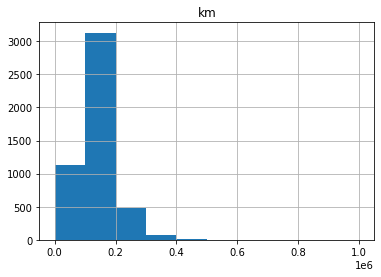

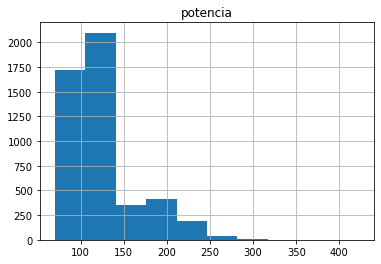

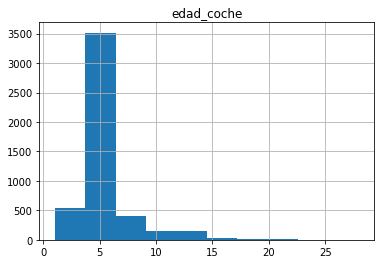

In [ ]:
for i in l_num:
  df_bmw3.hist(i)

In [ ]:
df_bmw3.describe()

,km,potencia,precio,edad_coche
count,4.813000e+03,4813.000000,4813.000000,4813.000000
mean,1.410220e+05,129.036874,15834.326992,5.415126
std,6.010183e+04,38.785941,9111.254178,2.554338
min,0.000000e+00,70.000000,400.000000,1.000000
25%,1.030340e+05,100.000000,10900.000000,4.000000
50%,1.410680e+05,120.000000,14200.000000,5.000000
75%,1.752520e+05,135.000000,18600.000000,6.000000
max,1.000376e+06,423.000000,178500.000000,28.000000


In [ ]:
for i in l_bool:
  print(df_bmw3[i].value_counts())

True     2647
False    2166
Name: volante_regulable, dtype: int64
True     3816
False     997
Name: aire_acondicionado, dtype: int64
False    3843
True      970
Name: camara_trasera, dtype: int64
False    3854
True      959
Name: asientos_traseros_plegables, dtype: int64
False    2594
True     2219
Name: elevalunas_electrico, dtype: int64
False    3648
True     1165
Name: bluetooth, dtype: int64
True     4488
False     325
Name: gps, dtype: int64
True     2599
False    2214
Name: alerta_lim_velocidad, dtype: int64


In [ ]:
for i in l_cat:
  print(df_bmw3[i].value_counts())

320                 747
520                 631
318                 563
X3                  437
116                 358
otros               288
X1                  274
316                 233
X5                  229
525                 183
530                 157
118                 143
318 Gran Turismo     97
320 Gran Turismo     73
518                  66
535                  46
X4                   46
X6                   43
420                  42
120                  36
420 Gran Coupé       33
730                  33
330                  32
520 Gran Turismo     23
Name: modelo, dtype: int64
diesel    4622
petrol     191
Name: tipo_gasolina, dtype: int64
black     1620
grey      1166
blue       701
white      532
brown      340
silver     326
otros       77
red         51
Name: color, dtype: int64
estate            1590
sedan             1166
suv               1054
hatchback          694
subcompact         112
coupe              100
convertible         46
van                 42
sin

In [ ]:
#

In [ ]:
df_bmw3.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4813 entries, 0 to 4842
Data columns (total 16 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   modelo                       4813 non-null   object 
 1   km                           4813 non-null   float64
 2   potencia                     4813 non-null   float64
 3   tipo_gasolina                4813 non-null   object 
 4   color                        4813 non-null   object 
 5   tipo_coche                   4813 non-null   object 
 6   volante_regulable            4813 non-null   bool   
 7   aire_acondicionado           4813 non-null   bool   
 8   camara_trasera               4813 non-null   bool   
 9   asientos_traseros_plegables  4813 non-null   bool   
 10  elevalunas_electrico         4813 non-null   bool   
 11  bluetooth                    4813 non-null   bool   
 12  gps                          4813 non-null   bool   
 13  alerta_lim_velocid

In [ ]:
corr = df_bmw3.corr()

In [ ]:
corr.style.background_gradient(cmap='coolwarm')

,km,potencia,volante_regulable,aire_acondicionado,camara_trasera,asientos_traseros_plegables,elevalunas_electrico,bluetooth,gps,alerta_lim_velocidad,precio,edad_coche
km,1.000000,-0.051067,0.068723,0.010687,0.002243,-0.052877,0.045713,-0.030472,0.154504,-0.039903,-0.405884,0.503221
potencia,-0.051067,1.000000,0.326200,0.200692,0.316963,0.448022,0.338279,0.232583,0.004538,0.490749,0.645569,-0.081972
volante_regulable,0.068723,0.326200,1.000000,0.307425,0.253537,0.230627,0.277834,0.133859,0.244225,0.224261,0.265612,0.076389
aire_acondicionado,0.010687,0.200692,0.307425,1.000000,0.150722,0.149727,0.284542,0.135646,0.371190,0.223606,0.246998,-0.235482
camara_trasera,0.002243,0.316963,0.253537,0.150722,1.000000,0.200628,0.198236,0.144149,0.060890,0.201819,0.256191,0.022373
asientos_traseros_plegables,-0.052877,0.448022,0.230627,0.149727,0.200628,1.000000,0.249247,0.154072,0.125944,0.277764,0.418492,-0.057657
elevalunas_electrico,0.045713,0.338279,0.277834,0.284542,0.198236,0.249247,1.000000,0.254843,0.202381,0.332636,0.262682,-0.094842
bluetooth,-0.030472,0.232583,0.133859,0.135646,0.144149,0.154072,0.254843,1.000000,0.128875,0.120593,0.213405,-0.074188
gps,0.154504,0.004538,0.244225,0.371190,0.060890,0.125944,0.202381,0.128875,1.000000,-0.063963,-0.003318,0.077454
alerta_lim_velocidad,-0.039903,0.490749,0.224261,0.223606,0.201819,0.277764,0.332636,0.120593,-0.063963,1.000000,0.446483,-0.182140


In [ ]:
#analisis de target (ver arriba en precio)

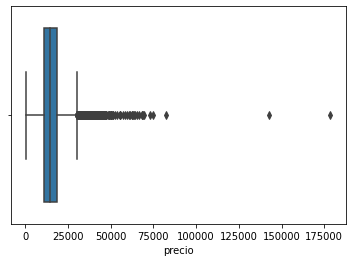

In [ ]:
sns.boxplot(x= df_bmw3["precio"])

In [ ]:
df_bmw3[df_bmw3["precio"]> 85000]

,modelo,km,potencia,tipo_gasolina,color,tipo_coche,volante_regulable,aire_acondicionado,camara_trasera,asientos_traseros_plegables,elevalunas_electrico,bluetooth,gps,alerta_lim_velocidad,precio,edad_coche
4684,X4,103222.0,140.0,diesel,grey,suv,True,True,False,False,True,False,True,True,142800.0,4
4753,X3,72515.0,135.0,diesel,blue,suv,False,False,True,False,False,False,False,True,178500.0,5


In [ ]:
df_bmw3["precio"]= np.where(df_bmw3["precio"] > 85000, media_precio, df_bmw3["precio"])

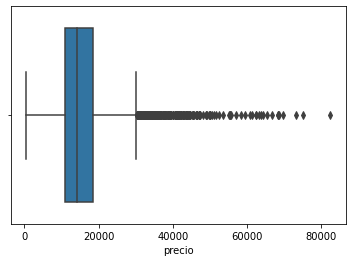

In [ ]:
sns.boxplot(x= df_bmw3["precio"])

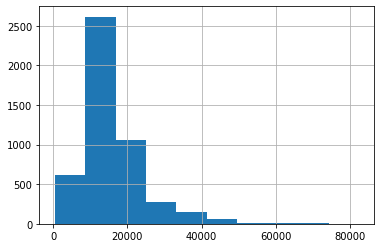

In [ ]:
df_bmw3["precio"].hist()

In [ ]:
df_bmw3.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4813 entries, 0 to 4842
Data columns (total 16 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   modelo                       4813 non-null   object 
 1   km                           4813 non-null   float64
 2   potencia                     4813 non-null   float64
 3   tipo_gasolina                4813 non-null   object 
 4   color                        4813 non-null   object 
 5   tipo_coche                   4813 non-null   object 
 6   volante_regulable            4813 non-null   bool   
 7   aire_acondicionado           4813 non-null   bool   
 8   camara_trasera               4813 non-null   bool   
 9   asientos_traseros_plegables  4813 non-null   bool   
 10  elevalunas_electrico         4813 non-null   bool   
 11  bluetooth                    4813 non-null   bool   
 12  gps                          4813 non-null   bool   
 13  alerta_lim_velocid

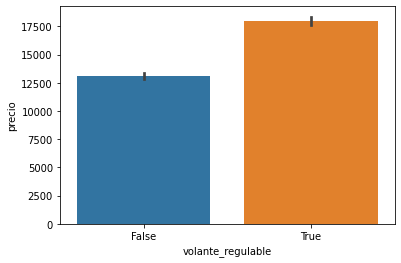

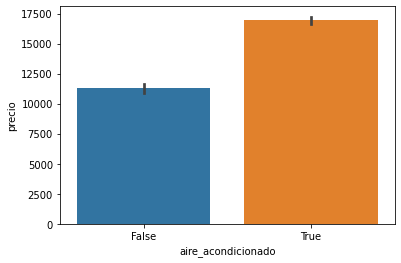

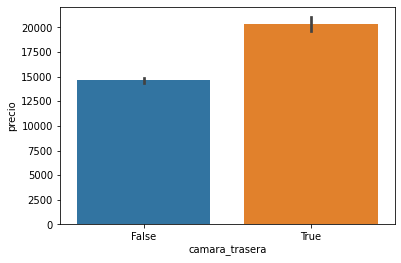

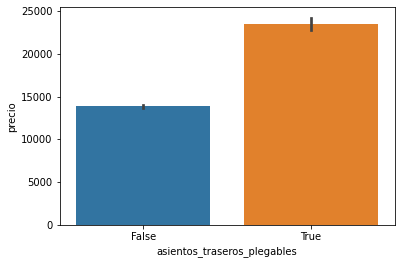

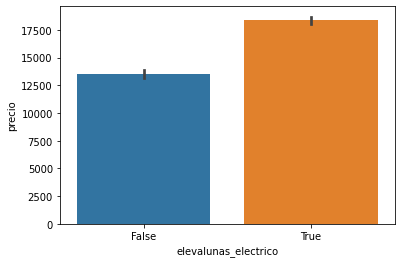

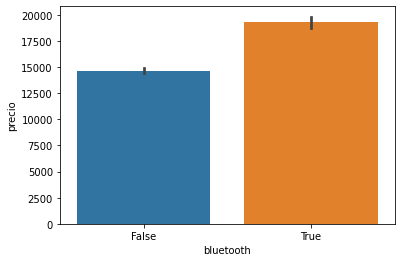

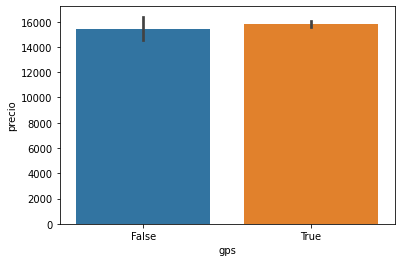

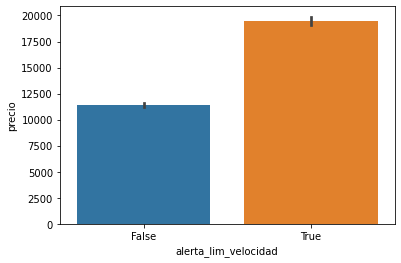

In [ ]:
for i in df_bmw3:
  if (df_bmw3[i].dtype.kind =="b"):
    plt.figure()
    sns.barplot(x=i,y="precio", data=df_bmw3) 

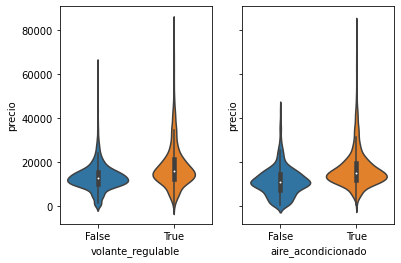

In [ ]:
fig, axes = plt.subplots(1, 2, sharey=True)
sns.violinplot(data=df_bmw3, x='volante_regulable', y='precio', ax=axes[0])
sns.violinplot(data=df_bmw3, x='aire_acondicionado', y='precio', ax=axes[1])

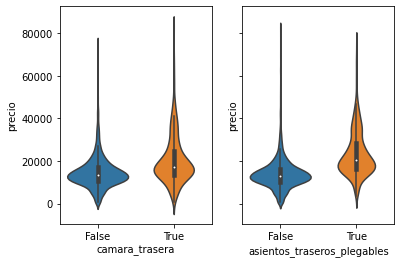

In [ ]:
fig, axes = plt.subplots(1, 2, sharey=True)
sns.violinplot(data=df_bmw3, x='camara_trasera', y='precio', ax=axes[0])
sns.violinplot(data=df_bmw3, x='asientos_traseros_plegables', y='precio', ax=axes[1])

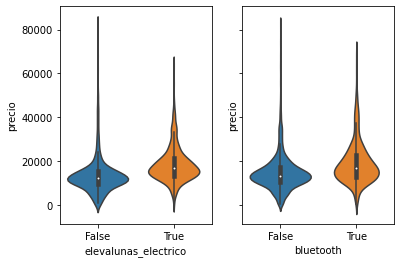

In [ ]:
fig, axes = plt.subplots(1, 2, sharey=True)
sns.violinplot(data=df_bmw3, x='elevalunas_electrico', y='precio', ax=axes[0])
sns.violinplot(data=df_bmw3, x='bluetooth', y='precio', ax=axes[1])

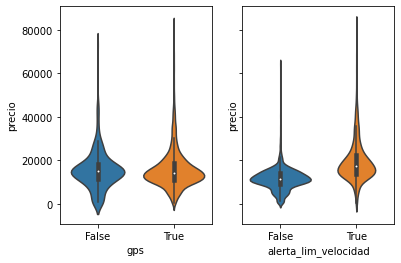

In [ ]:
fig, axes = plt.subplots(1, 2, sharey=True)
sns.violinplot(data=df_bmw3, x='gps', y='precio', ax=axes[0])
sns.violinplot(data=df_bmw3, x='alerta_lim_velocidad', y='precio', ax=axes[1])

In [ ]:
#comparar precio con object

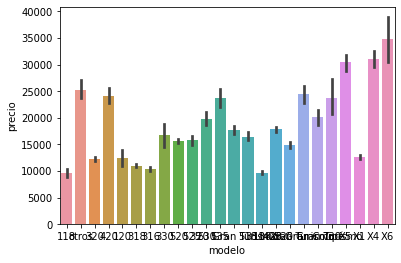

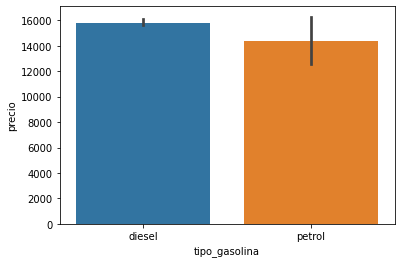

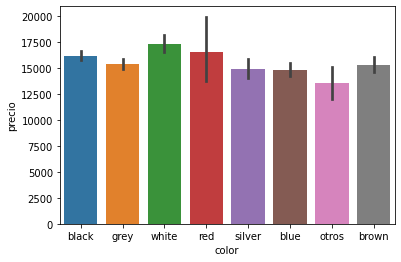

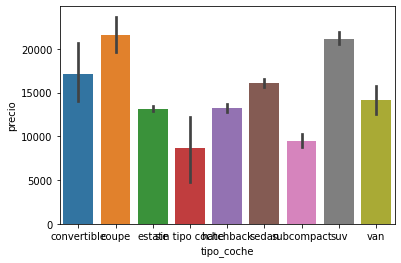

In [ ]:
for i in df_bmw3:
  if (df_bmw3[i].dtype.kind =="O"):
    plt.figure()
    sns.barplot(x=i,y="precio", data=df_bmw3)

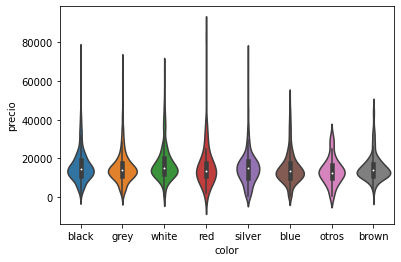

In [ ]:
sns.violinplot(x="color", y="precio", data=df_bmw3)

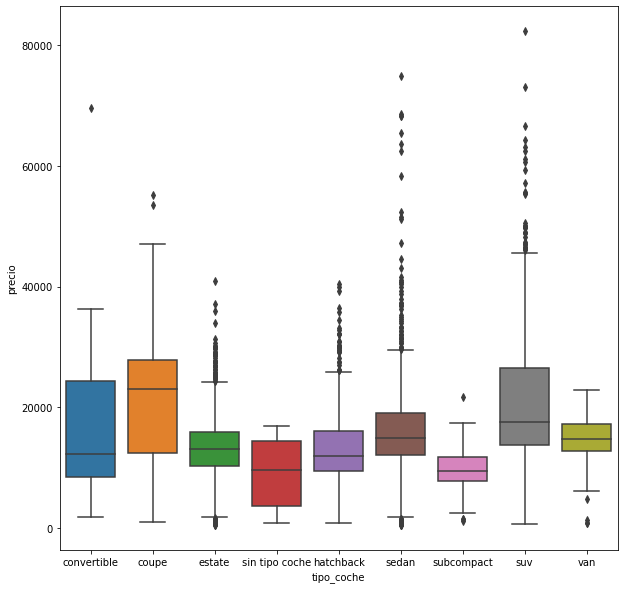

In [ ]:
plt.figure(figsize=(10,10))
sns.boxplot(x="tipo_coche", y="precio", data=df_bmw3)

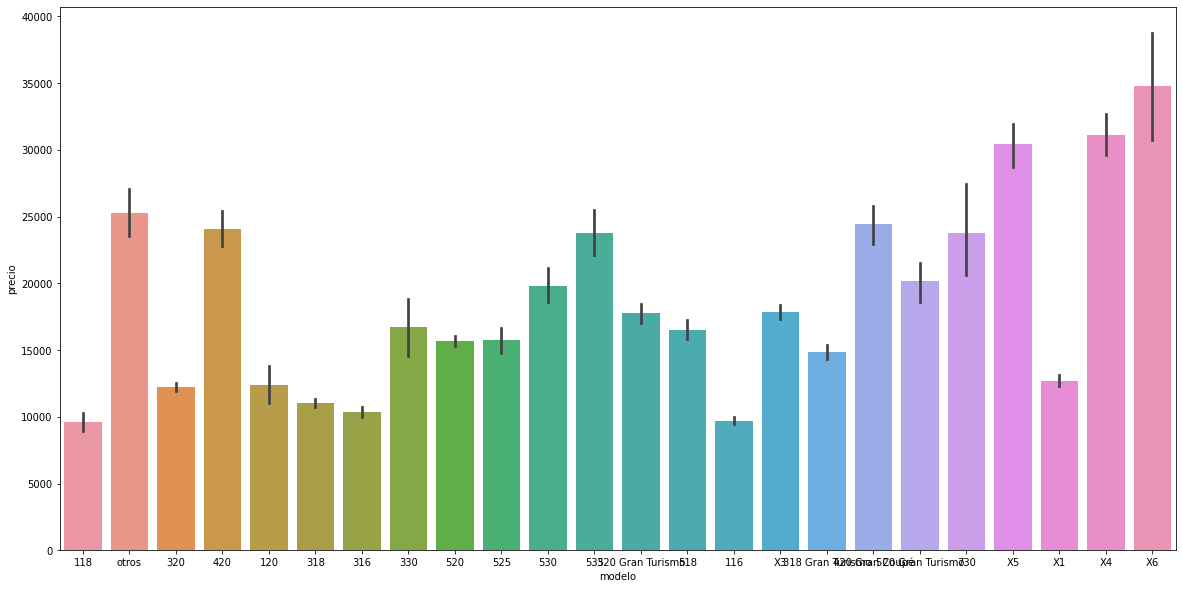

In [ ]:
plt.figure(figsize=(20,10))
sns.barplot(x="modelo", y="precio", data=df_bmw3)

In [ ]:
#comparacion precio con numericas 

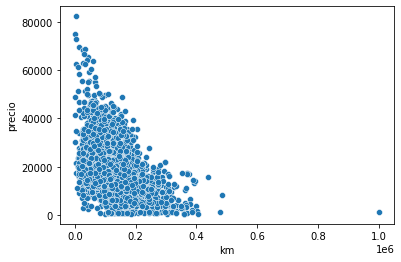

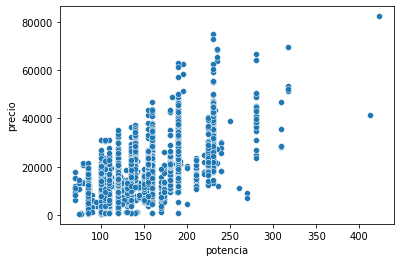

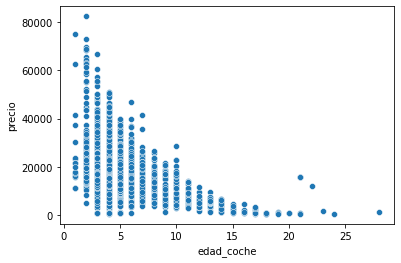

In [ ]:
for i in df_bmw3:
  if (df_bmw3[i].dtype.kind in ("i","f")) and (i!="precio"):
    plt.figure()
    sns.scatterplot(x=i,y="precio", data=df_bmw3)  

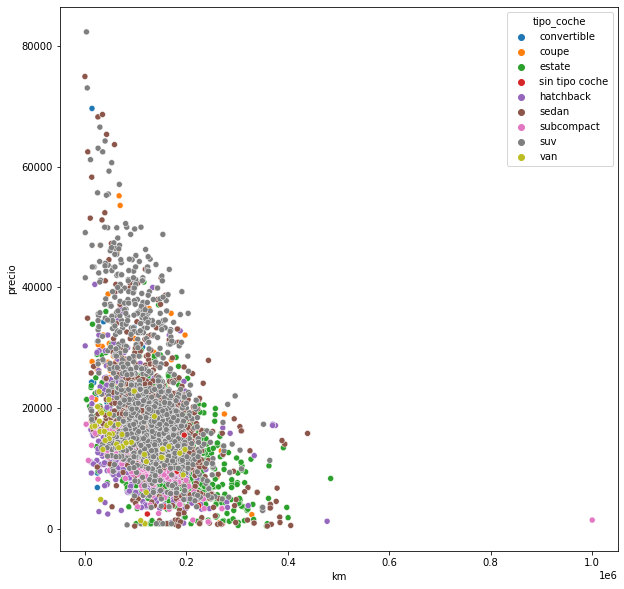

In [ ]:
plt.figure(figsize=(10,10))
sns.scatterplot(x="km", y="precio", hue="tipo_coche", data=df_bmw3)

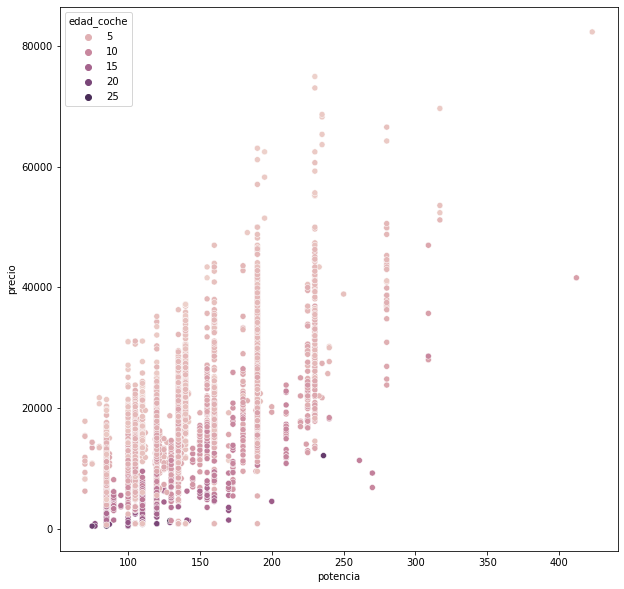

In [ ]:
plt.figure(figsize=(10,10))
sns.scatterplot(x="potencia", y="precio", hue="edad_coche", data=df_bmw3)

In [ ]:
#borro columna de color ya que por lo visto en el grafico el color no es un factor determinante para predecir el precio

In [ ]:
df_bmw3.head()

,modelo,km,potencia,tipo_gasolina,color,tipo_coche,volante_regulable,aire_acondicionado,camara_trasera,asientos_traseros_plegables,elevalunas_electrico,bluetooth,gps,alerta_lim_velocidad,precio,edad_coche
0,118,140411.0,100.0,diesel,black,convertible,True,True,False,False,True,True,True,False,11300.0,6
1,otros,13929.0,317.0,petrol,grey,convertible,True,True,False,False,False,True,True,True,69700.0,2
2,320,183297.0,120.0,diesel,white,convertible,False,False,False,False,True,False,True,False,10200.0,6
3,420,128035.0,135.0,diesel,red,convertible,True,True,False,False,True,True,True,True,25100.0,4
4,otros,97097.0,160.0,diesel,silver,convertible,True,True,False,False,False,True,True,True,33400.0,3


In [ ]:
#hacer comparación 

In [ ]:
df_bmw3.head()

,modelo,km,potencia,tipo_gasolina,color,tipo_coche,volante_regulable,aire_acondicionado,camara_trasera,asientos_traseros_plegables,elevalunas_electrico,bluetooth,gps,alerta_lim_velocidad,precio,edad_coche
0,118,140411.0,100.0,diesel,black,convertible,True,True,False,False,True,True,True,False,11300.0,6
1,otros,13929.0,317.0,petrol,grey,convertible,True,True,False,False,False,True,True,True,69700.0,2
2,320,183297.0,120.0,diesel,white,convertible,False,False,False,False,True,False,True,False,10200.0,6
3,420,128035.0,135.0,diesel,red,convertible,True,True,False,False,True,True,True,True,25100.0,4
4,otros,97097.0,160.0,diesel,silver,convertible,True,True,False,False,False,True,True,True,33400.0,3


In [ ]:
l_cat

['modelo', 'tipo_gasolina', 'color', 'tipo_coche']

In [ ]:
df_bmw3 = pd.get_dummies(data=df_bmw3,columns=l_cat) 

In [ ]:
df_bmw3.head()

,km,potencia,volante_regulable,aire_acondicionado,camara_trasera,asientos_traseros_plegables,elevalunas_electrico,bluetooth,gps,alerta_lim_velocidad,...,color_white,tipo_coche_convertible,tipo_coche_coupe,tipo_coche_estate,tipo_coche_hatchback,tipo_coche_sedan,tipo_coche_sin tipo coche,tipo_coche_subcompact,tipo_coche_suv,tipo_coche_van
0,140411.0,100.0,True,True,False,False,True,True,True,False,...,0,1,0,0,0,0,0,0,0,0
1,13929.0,317.0,True,True,False,False,False,True,True,True,...,0,1,0,0,0,0,0,0,0,0
2,183297.0,120.0,False,False,False,False,True,False,True,False,...,1,1,0,0,0,0,0,0,0,0
3,128035.0,135.0,True,True,False,False,True,True,True,True,...,0,1,0,0,0,0,0,0,0,0
4,97097.0,160.0,True,True,False,False,False,True,True,True,...,0,1,0,0,0,0,0,0,0,0


In [ ]:
df_bmw3.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4813 entries, 0 to 4842
Data columns (total 55 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   km                           4813 non-null   float64
 1   potencia                     4813 non-null   float64
 2   volante_regulable            4813 non-null   bool   
 3   aire_acondicionado           4813 non-null   bool   
 4   camara_trasera               4813 non-null   bool   
 5   asientos_traseros_plegables  4813 non-null   bool   
 6   elevalunas_electrico         4813 non-null   bool   
 7   bluetooth                    4813 non-null   bool   
 8   gps                          4813 non-null   bool   
 9   alerta_lim_velocidad         4813 non-null   bool   
 10  precio                       4813 non-null   float64
 11  edad_coche                   4813 non-null   int64  
 12  modelo_116                   4813 non-null   uint8  
 13  modelo_118        

In [ ]:
columnas_booleanas = ['volante_regulable','aire_acondicionado', 'camara_trasera', 'asientos_traseros_plegables', 'elevalunas_electrico','bluetooth','gps','alerta_lim_velocidad'] 
for columna in columnas_booleanas :
  df_bmw3[columna] =df_bmw3[columna].astype(int)

In [ ]:
df_bmw3.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4813 entries, 0 to 4842
Data columns (total 55 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   km                           4813 non-null   float64
 1   potencia                     4813 non-null   float64
 2   volante_regulable            4813 non-null   int64  
 3   aire_acondicionado           4813 non-null   int64  
 4   camara_trasera               4813 non-null   int64  
 5   asientos_traseros_plegables  4813 non-null   int64  
 6   elevalunas_electrico         4813 non-null   int64  
 7   bluetooth                    4813 non-null   int64  
 8   gps                          4813 non-null   int64  
 9   alerta_lim_velocidad         4813 non-null   int64  
 10  precio                       4813 non-null   float64
 11  edad_coche                   4813 non-null   int64  
 12  modelo_116                   4813 non-null   uint8  
 13  modelo_118        

In [ ]:
from sklearn.feature_selection import VarianceThreshold

In [ ]:
#vt = VarianceThreshold(threshold = 0.01) #Eliminamos columnas donde el 99% de los valores son iguales
#vt.fit(X)

#cols_lowvar = X.columns[vt.get_support()==False]
#X.drop(columns=cols_lowvar,inplace=True)

#print(len(cols_lowvar),' low variance features were removed:\n', cols_lowvar.to_list())

In [ ]:
df_bmw3.head()

,km,potencia,volante_regulable,aire_acondicionado,camara_trasera,asientos_traseros_plegables,elevalunas_electrico,bluetooth,gps,alerta_lim_velocidad,...,color_white,tipo_coche_convertible,tipo_coche_coupe,tipo_coche_estate,tipo_coche_hatchback,tipo_coche_sedan,tipo_coche_sin tipo coche,tipo_coche_subcompact,tipo_coche_suv,tipo_coche_van
0,140411.0,100.0,1,1,0,0,1,1,1,0,...,0,1,0,0,0,0,0,0,0,0
1,13929.0,317.0,1,1,0,0,0,1,1,1,...,0,1,0,0,0,0,0,0,0,0
2,183297.0,120.0,0,0,0,0,1,0,1,0,...,1,1,0,0,0,0,0,0,0,0
3,128035.0,135.0,1,1,0,0,1,1,1,1,...,0,1,0,0,0,0,0,0,0,0
4,97097.0,160.0,1,1,0,0,0,1,1,1,...,0,1,0,0,0,0,0,0,0,0


In [ ]:
corr.style.background_gradient(cmap='coolwarm')

,km,potencia,volante_regulable,aire_acondicionado,camara_trasera,asientos_traseros_plegables,elevalunas_electrico,bluetooth,gps,alerta_lim_velocidad,precio,edad_coche
km,1.000000,-0.051067,0.068723,0.010687,0.002243,-0.052877,0.045713,-0.030472,0.154504,-0.039903,-0.405884,0.503221
potencia,-0.051067,1.000000,0.326200,0.200692,0.316963,0.448022,0.338279,0.232583,0.004538,0.490749,0.645569,-0.081972
volante_regulable,0.068723,0.326200,1.000000,0.307425,0.253537,0.230627,0.277834,0.133859,0.244225,0.224261,0.265612,0.076389
aire_acondicionado,0.010687,0.200692,0.307425,1.000000,0.150722,0.149727,0.284542,0.135646,0.371190,0.223606,0.246998,-0.235482
camara_trasera,0.002243,0.316963,0.253537,0.150722,1.000000,0.200628,0.198236,0.144149,0.060890,0.201819,0.256191,0.022373
asientos_traseros_plegables,-0.052877,0.448022,0.230627,0.149727,0.200628,1.000000,0.249247,0.154072,0.125944,0.277764,0.418492,-0.057657
elevalunas_electrico,0.045713,0.338279,0.277834,0.284542,0.198236,0.249247,1.000000,0.254843,0.202381,0.332636,0.262682,-0.094842
bluetooth,-0.030472,0.232583,0.133859,0.135646,0.144149,0.154072,0.254843,1.000000,0.128875,0.120593,0.213405,-0.074188
gps,0.154504,0.004538,0.244225,0.371190,0.060890,0.125944,0.202381,0.128875,1.000000,-0.063963,-0.003318,0.077454
alerta_lim_velocidad,-0.039903,0.490749,0.224261,0.223606,0.201819,0.277764,0.332636,0.120593,-0.063963,1.000000,0.446483,-0.182140


In [ ]:
df_bmw3.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4813 entries, 0 to 4842
Data columns (total 55 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   km                           4813 non-null   float64
 1   potencia                     4813 non-null   float64
 2   volante_regulable            4813 non-null   int64  
 3   aire_acondicionado           4813 non-null   int64  
 4   camara_trasera               4813 non-null   int64  
 5   asientos_traseros_plegables  4813 non-null   int64  
 6   elevalunas_electrico         4813 non-null   int64  
 7   bluetooth                    4813 non-null   int64  
 8   gps                          4813 non-null   int64  
 9   alerta_lim_velocidad         4813 non-null   int64  
 10  precio                       4813 non-null   float64
 11  edad_coche                   4813 non-null   int64  
 12  modelo_116                   4813 non-null   uint8  
 13  modelo_118        

In [ ]:
for i in ("color_black", "color_blue","color_brown", "color_grey", "color_otros", "color_red", "color_silver", "color_white"):
  del(df_bmw3[i])

In [ ]:
df_bmw3.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4813 entries, 0 to 4842
Data columns (total 47 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   km                           4813 non-null   float64
 1   potencia                     4813 non-null   float64
 2   volante_regulable            4813 non-null   int64  
 3   aire_acondicionado           4813 non-null   int64  
 4   camara_trasera               4813 non-null   int64  
 5   asientos_traseros_plegables  4813 non-null   int64  
 6   elevalunas_electrico         4813 non-null   int64  
 7   bluetooth                    4813 non-null   int64  
 8   gps                          4813 non-null   int64  
 9   alerta_lim_velocidad         4813 non-null   int64  
 10  precio                       4813 non-null   float64
 11  edad_coche                   4813 non-null   int64  
 12  modelo_116                   4813 non-null   uint8  
 13  modelo_118        

In [ ]:
minMaxResultado = MinMaxScaler()

In [ ]:
df_bmw3["km"]= minMaxResultado.fit_transform(df_bmw3["km"].values.reshape(-1,1))

In [ ]:
df_bmw3["potencia"]= minMaxResultado.fit_transform(df_bmw3["potencia"].values.reshape(-1,1))

In [ ]:
df_bmw3["edad_coche"]= minMaxResultado.fit_transform(df_bmw3["edad_coche"].values.reshape(-1,1))

In [ ]:
df_bmw3.head()

,km,potencia,volante_regulable,aire_acondicionado,camara_trasera,asientos_traseros_plegables,elevalunas_electrico,bluetooth,gps,alerta_lim_velocidad,...,tipo_gasolina_petrol,tipo_coche_convertible,tipo_coche_coupe,tipo_coche_estate,tipo_coche_hatchback,tipo_coche_sedan,tipo_coche_sin tipo coche,tipo_coche_subcompact,tipo_coche_suv,tipo_coche_van
0,0.140358,0.084986,1,1,0,0,1,1,1,0,...,0,1,0,0,0,0,0,0,0,0
1,0.013924,0.699717,1,1,0,0,0,1,1,1,...,1,1,0,0,0,0,0,0,0,0
2,0.183228,0.141643,0,0,0,0,1,0,1,0,...,0,1,0,0,0,0,0,0,0,0
3,0.127987,0.184136,1,1,0,0,1,1,1,1,...,0,1,0,0,0,0,0,0,0,0
4,0.097061,0.254958,1,1,0,0,0,1,1,1,...,0,1,0,0,0,0,0,0,0,0


In [ ]:
df_bmw3.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4813 entries, 0 to 4842
Data columns (total 47 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   km                           4813 non-null   float64
 1   potencia                     4813 non-null   float64
 2   volante_regulable            4813 non-null   int64  
 3   aire_acondicionado           4813 non-null   int64  
 4   camara_trasera               4813 non-null   int64  
 5   asientos_traseros_plegables  4813 non-null   int64  
 6   elevalunas_electrico         4813 non-null   int64  
 7   bluetooth                    4813 non-null   int64  
 8   gps                          4813 non-null   int64  
 9   alerta_lim_velocidad         4813 non-null   int64  
 10  precio                       4813 non-null   float64
 11  edad_coche                   4813 non-null   float64
 12  modelo_116                   4813 non-null   uint8  
 13  modelo_118        

In [ ]:
corr.style.background_gradient(cmap='coolwarm')

,km,potencia,volante_regulable,aire_acondicionado,camara_trasera,asientos_traseros_plegables,elevalunas_electrico,bluetooth,gps,alerta_lim_velocidad,precio,edad_coche
km,1.000000,-0.051067,0.068723,0.010687,0.002243,-0.052877,0.045713,-0.030472,0.154504,-0.039903,-0.405884,0.503221
potencia,-0.051067,1.000000,0.326200,0.200692,0.316963,0.448022,0.338279,0.232583,0.004538,0.490749,0.645569,-0.081972
volante_regulable,0.068723,0.326200,1.000000,0.307425,0.253537,0.230627,0.277834,0.133859,0.244225,0.224261,0.265612,0.076389
aire_acondicionado,0.010687,0.200692,0.307425,1.000000,0.150722,0.149727,0.284542,0.135646,0.371190,0.223606,0.246998,-0.235482
camara_trasera,0.002243,0.316963,0.253537,0.150722,1.000000,0.200628,0.198236,0.144149,0.060890,0.201819,0.256191,0.022373
asientos_traseros_plegables,-0.052877,0.448022,0.230627,0.149727,0.200628,1.000000,0.249247,0.154072,0.125944,0.277764,0.418492,-0.057657
elevalunas_electrico,0.045713,0.338279,0.277834,0.284542,0.198236,0.249247,1.000000,0.254843,0.202381,0.332636,0.262682,-0.094842
bluetooth,-0.030472,0.232583,0.133859,0.135646,0.144149,0.154072,0.254843,1.000000,0.128875,0.120593,0.213405,-0.074188
gps,0.154504,0.004538,0.244225,0.371190,0.060890,0.125944,0.202381,0.128875,1.000000,-0.063963,-0.003318,0.077454
alerta_lim_velocidad,-0.039903,0.490749,0.224261,0.223606,0.201819,0.277764,0.332636,0.120593,-0.063963,1.000000,0.446483,-0.182140


In [ ]:
pd.to_pickle(df_bmw3,"/content/drive/MyDrive/DATA _EN_GINEERING/DSC0922_data_engineering/Clases/TAREA BMW/df_bmw_clean")

In [ ]:
df_bmw_clean = pd.read_pickle("/content/drive/MyDrive/DATA _EN_GINEERING/DSC0922_data_engineering/Clases/TAREA BMW/df_bmw_clean")

In [ ]:
df_bmw_clean.head()

,km,potencia,volante_regulable,aire_acondicionado,camara_trasera,asientos_traseros_plegables,elevalunas_electrico,bluetooth,gps,alerta_lim_velocidad,...,tipo_gasolina_petrol,tipo_coche_convertible,tipo_coche_coupe,tipo_coche_estate,tipo_coche_hatchback,tipo_coche_sedan,tipo_coche_sin tipo coche,tipo_coche_subcompact,tipo_coche_suv,tipo_coche_van
0,0.140358,0.084986,1,1,0,0,1,1,1,0,...,0,1,0,0,0,0,0,0,0,0
1,0.013924,0.699717,1,1,0,0,0,1,1,1,...,1,1,0,0,0,0,0,0,0,0
2,0.183228,0.141643,0,0,0,0,1,0,1,0,...,0,1,0,0,0,0,0,0,0,0
3,0.127987,0.184136,1,1,0,0,1,1,1,1,...,0,1,0,0,0,0,0,0,0,0
4,0.097061,0.254958,1,1,0,0,0,1,1,1,...,0,1,0,0,0,0,0,0,0,0


In [ ]:
#hacer el modelo

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
df_bmw_final =  df_bmw_clean.copy()

In [ ]:
X = df_bmw_final.drop('precio',axis=1) 
y = df_bmw_final['precio'] 


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3,random_state=23)

In [ ]:
from sklearn.linear_model import LinearRegression
lin_reg= LinearRegression()
lin_reg.fit(X_train,y_train)

LinearRegression()

In [ ]:
y_pred = lin_reg.predict(X_test)

In [ ]:
df_resultados = pd.DataFrame({'Actual': y_test, 'Predicted':y_pred})

In [ ]:
from sklearn import metrics

In [ ]:
print ("MAE", metrics.mean_absolute_error(y_test, y_pred))

MAE 2524.32241147589
